In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.1+cpu'

In [3]:
weight = 0.7
bias = 0.3

# create a dataset
start = 0
end = 1 
step = 0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias


In [4]:
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [6]:
len(X), len(y)

(50, 50)

In [7]:
dataset = {
    'X':X.numpy().flatten(),
    'y':y.numpy().flatten()
}

df = pd.DataFrame(data=dataset)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       50 non-null     float32
 1   y       50 non-null     float32
dtypes: float32(2)
memory usage: 532.0 bytes


In [9]:
df.describe()

,X,y
count,50.000000,50.000000
mean,0.490000,0.643000
std,0.291548,0.204083
min,0.000000,0.300000
25%,0.245000,0.471500
50%,0.490000,0.643000
75%,0.735000,0.814500
max,0.980000,0.986000


In [10]:
df.head()

,X,y
0,0.00,0.300
1,0.02,0.314
2,0.04,0.328
3,0.06,0.342
4,0.08,0.356


In [11]:
df.tail()

,X,y
45,0.90,0.930
46,0.92,0.944
47,0.94,0.958
48,0.96,0.972
49,0.98,0.986


In [12]:
df.sample()

,X,y
16,0.32,0.524


In [13]:
# train test split manually
split = int(0.8*len(X))
X_train,y_train = X[:split], y[:split]
X_test,y_test = X[split:], y[split:]


In [14]:
len(X_train), len(y_train)

(40, 40)

In [15]:
len(X_test), len(y_test)

(10, 10)

In [16]:
def plot_data(train_data=X_train, train_labels=y_train, test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c='g',s=4,label="Test Data")    
    
    if predictions is not None:
        plt.scatter(test_data,predictions, c='r', label="Predictions")
        
    plt.legend(prop={"size":14});
    

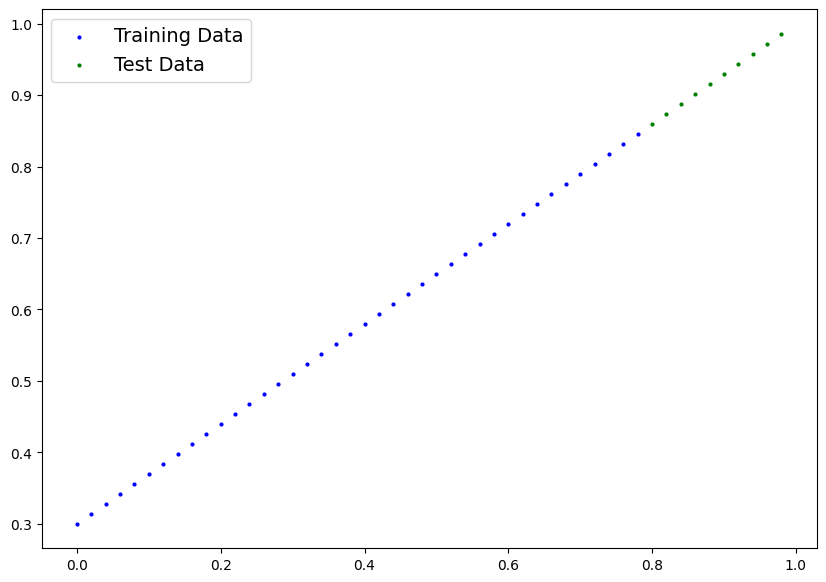

In [17]:
plot_data()

In [18]:
from torch import nn

In [19]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights*x+self.bias
    

In [20]:
# creating a manual seed for consirency of output
torch.manual_seed(42)

In [21]:
# Create an Object of above class 
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
# in pytorch we must switch inferences
with torch.inference_mode():
    y_pred=model_0(X_test)

In [23]:
len(y_pred)

10

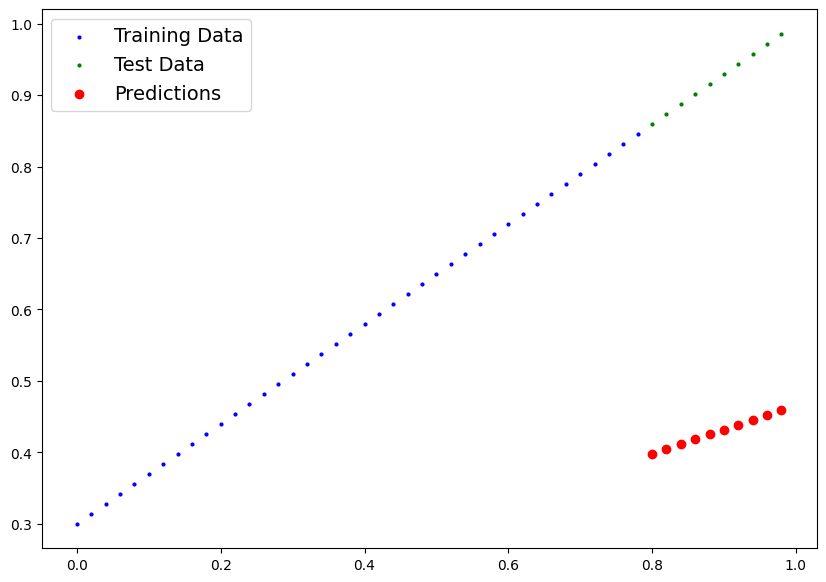

In [24]:
plot_data(predictions=y_pred)

In [25]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [26]:
# Building a training loop
# epochs = 10
epochs = 200


# tracking different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
    model_0.train()
    
    # 1. Forward Pass
    y_pred = model_0(X_train)
    
    #2. Compute Loss
    loss = loss_fn(y_pred,y_train)
    
    #3. Optimzer Zero Grad
    optimizer.zero_grad()
    
    #4. Perform Backpropagation
    loss.backward()
    
    #5. Step the optimizer
    optimizer.step()
    
    # Testing
    model_0.eval()
    
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred,y_test)
        
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 1 | Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 2 | Loss: 0.28983935713768005 | Test Loss: 0.4541231691837311
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Epoch: 3 | Loss: 0.2783183455467224 | Test Loss: 0.44065219163894653
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Epoch: 4 | Loss: 0.26679736375808716 | Test Loss: 0.4271811842918396
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Epoch: 5 | Loss: 0.2552763521671295 | Test Loss: 0.41371020674705505
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Epoch: 6 | Loss: 0.24375534057617188 | Test Loss: 0.40023916959762573
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Epoch

In [27]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    

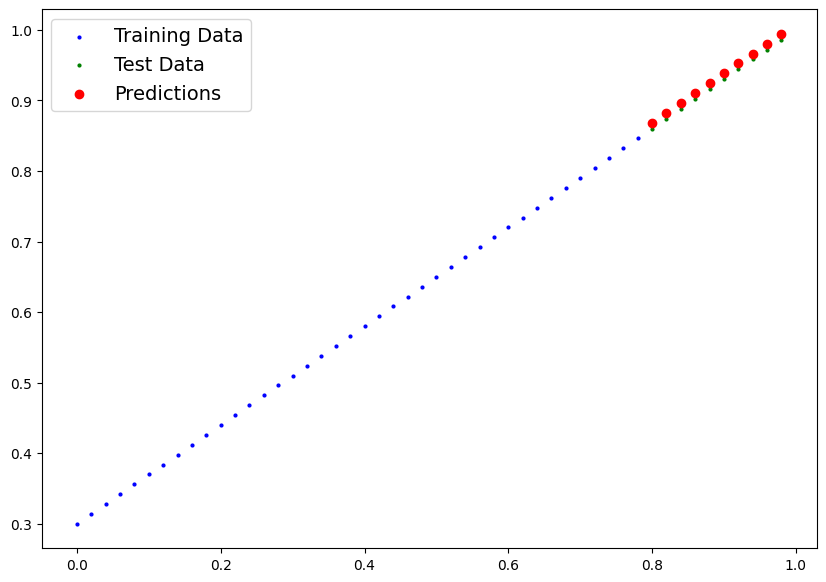

In [29]:
plot_data(predictions = y_pred)

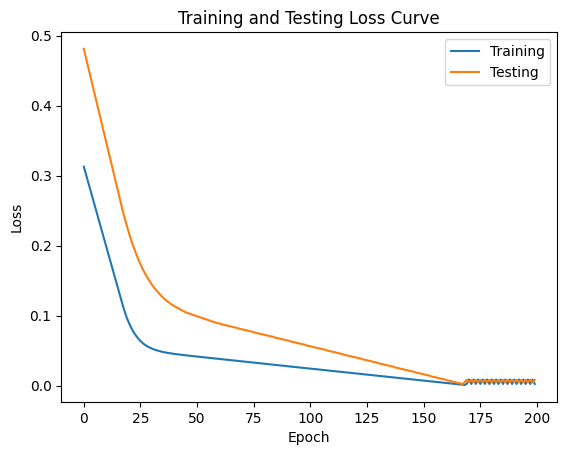

In [30]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Training")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label="Testing")
plt.title("Training and Testing Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();
